# Contour can simply defined as a curve that joins a set of points enclosing an area having the same color of intensity.

## Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read Image

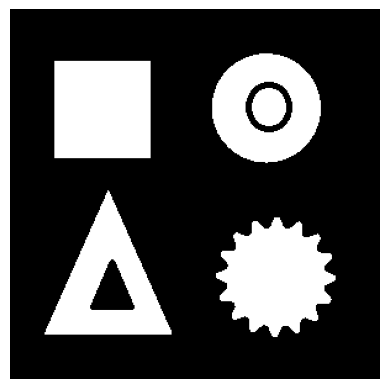

In [2]:
#read image
image = cv2.imread("images/shapes.png")

image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray');
plt.axis("off");

## Detecting Contours on image

### Syntax : 
    contours,hierarchy = cv2.findContours(image, mode, method, contours, hierarchy, offset)


### Parameters:
    image  : image
    mode   : It is contour retrieval mode (RETR_EXTERNAL, RETR_LIST, RETR_CCOMP, RETR_TREE)
    method : It is contour approximation method (CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE, CHAIN_APPROX_TC89_L1,etc)
    offset : It is optional offset by which every contour point is shifted.
### Returns:
    contours  : It is detected contours.
    hierarchy : It is optional output vector containing information about the image topology.

In [3]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Number of contours found = {len(contours)}")

Number of contours found = 4


## Visualizing the contours detected

### Syntax:
    cv2.drawContours(image, contours, contourIdx, color, thickness, lineType, hierarchy, maxLevel, offset)

### Parameters:
    image      : image
    contours   : array of contours
    contourIdx : parameter indicating a contour to draw. If negative, all contours are drawn.
    color      : color of contour
    thickness  : thickness of lines of contours are drawn with.
    lineType   : type of lineType
    hierarchy  : needed if you want to draw some of the contours.
    maxLevel   : is maximal level for drawn contours. If 0 only specified contour is drawn. If 1 function draws all contours and nested contours.If 2 function draws contours, all nested contours, all nested to nested contours. This parameter is taken only if hierarchy is given.
    offset     : shift drawn contours.

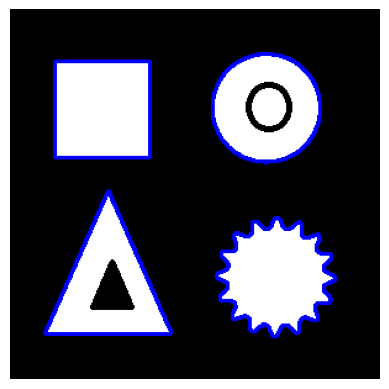

In [4]:
### Read the image in color mode for drawing purposes.
image_copy = cv2.imread('images/shapes.png')

### Draw all contours
cv2.drawContours(image_copy, contours, -1, (0,0,255),2 )

### Display the result
plt.imshow(image_copy);
plt.axis("off");

--------------------------------------------------------------
Number of contours found in RETR_EXTERNAL = 4


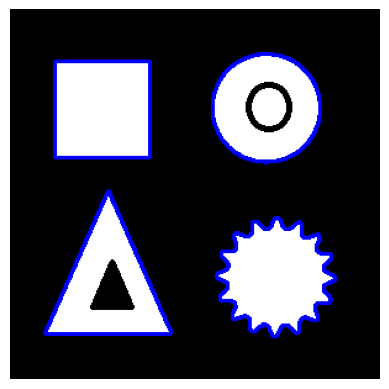

--------------------------------------------------------------
Number of contours found in RETR_LIST = 7


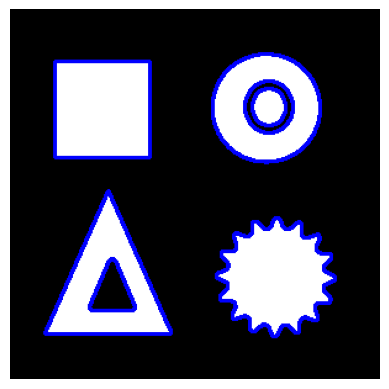

--------------------------------------------------------------
Number of contours found in RETR_CCOMP = 7


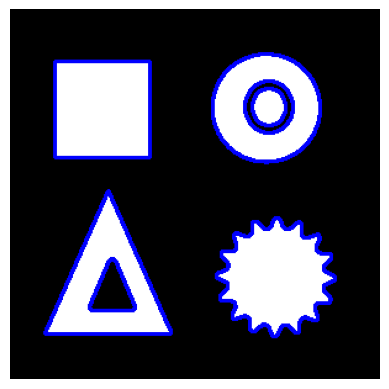

--------------------------------------------------------------
Number of contours found in RETR_TREE = 7


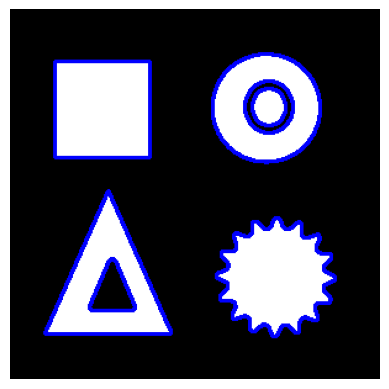

In [5]:
contours_types = [cv2.RETR_EXTERNAL,cv2.RETR_LIST, cv2.RETR_CCOMP, cv2.RETR_TREE]
contours_types_str = ["RETR_EXTERNAL","RETR_LIST", "RETR_CCOMP", "RETR_TREE"]
for contours_type in contours_types:
    contours, hierarchy = cv2.findContours(image, contours_type, cv2.CHAIN_APPROX_SIMPLE)
    print("--------------------------------------------------------------")
    print(f"Number of contours found in {contours_types_str[contours_type]} = {len(contours)}")
    ### Read the image in color mode for drawing purposes.
    image_copy = cv2.imread('images/shapes.png')

    ### Draw all contours
    cv2.drawContours(image_copy, contours, -1, (0,0,255),2 )

    ### Display the result
    plt.imshow(image_copy);
    plt.axis("off");
    plt.show();

## PreProcessing for Contour Detection
    Threshold-based Pre-processing
    Edge Based Pre-processsing

## Threshold-Based Pre-Processing
    Convert to Gray-Scale
    Create binary image with Thresholding
    Detect and Draw contours

### Good results in cv2.imshow()

(648, 1152, 3)


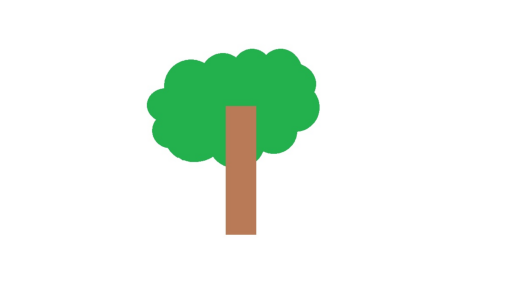

In [6]:
### Read Image
tree = cv2.imread('images/tree.jpg')
tree = cv2.cvtColor(tree, cv2.COLOR_RGBA2RGB);

print(tree.shape)
### Display Image
plt.imshow(cv2.cvtColor(tree, cv2.COLOR_BGR2RGB));
plt.axis("off");

# cv2.imshow("Original",tree)
# cv2.waitKey(0)

### Convert to Gray

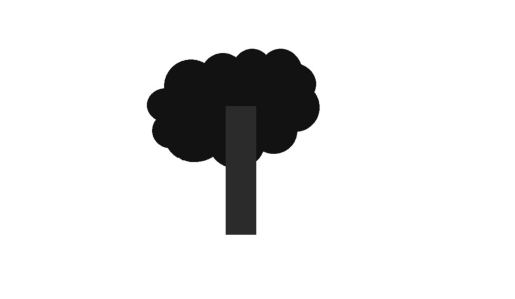

In [7]:
tree_original = tree.copy()

### Convert to Gray
gray = cv2.cvtColor(tree, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap = "gray");
plt.axis("off");

# cv2.imshow("gray",gray)
# cv2.waitKey(0)

### Inverting the image

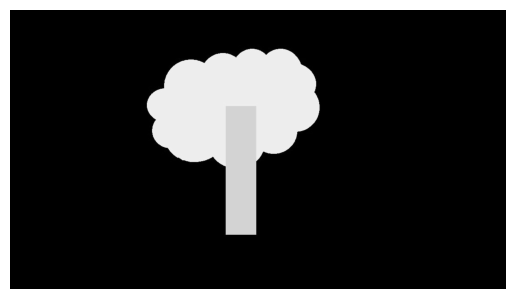

In [8]:
gray_inverted = cv2.bitwise_not(gray)
### Display the result

plt.imshow(gray_inverted, cmap = "gray");
plt.axis("off");

# cv2.imshow("Gray_Inverted",gray_inverted)
# cv2.waitKey(0)

### Finding the contours

--------------------------------------------------------------
Number of contours found in RETR_EXTERNAL = 66


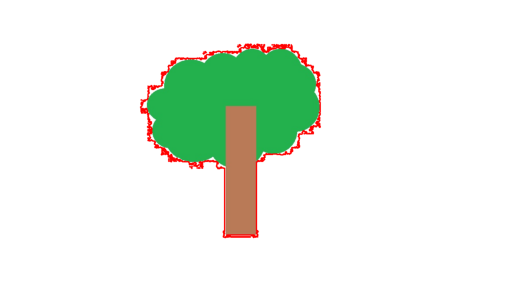

--------------------------------------------------------------
Number of contours found in RETR_LIST = 450


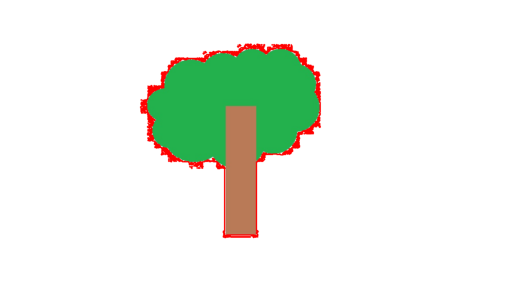

--------------------------------------------------------------
Number of contours found in RETR_CCOMP = 450


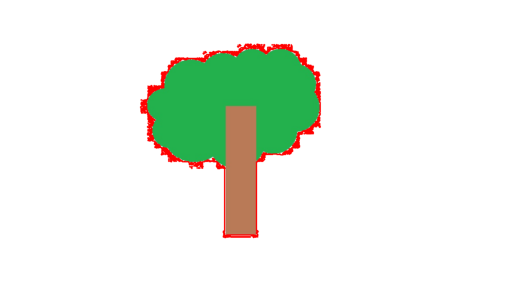

--------------------------------------------------------------
Number of contours found in RETR_TREE = 450


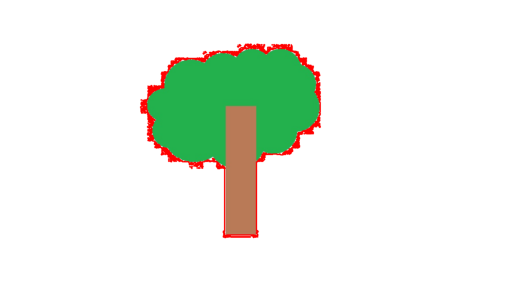

In [9]:
contours_types = [cv2.RETR_EXTERNAL,cv2.RETR_LIST, cv2.RETR_CCOMP, cv2.RETR_TREE]
contours_types_str = ["RETR_EXTERNAL","RETR_LIST", "RETR_CCOMP", "RETR_TREE"]
for contours_type in contours_types:
    contours, hierarchy = cv2.findContours(gray_inverted, contours_type, cv2.CHAIN_APPROX_SIMPLE)
    print("--------------------------------------------------------------")
    print(f"Number of contours found in {contours_types_str[contours_type]} = {len(contours)}")
    ### Read the image in color mode for drawing purposes.
    image_copy = cv2.imread('images/shapes.png')

    ### Draw all contours
    cv2.drawContours(tree_original, contours, -1, (0,0,255),2 )

    ### Display the result
    plt.imshow(cv2.cvtColor(tree_original,cv2.COLOR_BGR2RGB));
    plt.axis("off");
    plt.show();
    
    # cv2.imshow(f"{contours_types_str[contours_type]} Contours",tree_original)
    # cv2.waitKey(0)
    

### Thresholding Properly

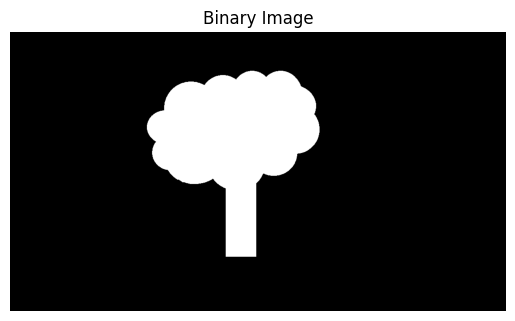

In [10]:
### Create a binary threshold image
_, binary = cv2.threshold(gray_inverted, 50, 225, cv2.THRESH_BINARY)

### Display the result
plt.imshow(binary, cmap = "gray");
plt.title("Binary Image");
plt.axis("off");

--------------------------------------------------------------
Number of contours found in RETR_EXTERNAL = 1


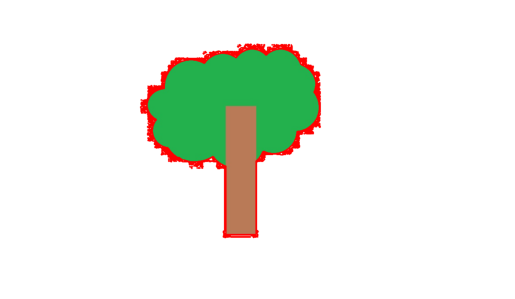

--------------------------------------------------------------
Number of contours found in RETR_LIST = 1


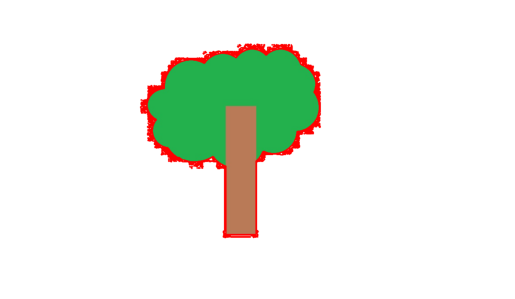

--------------------------------------------------------------
Number of contours found in RETR_CCOMP = 1


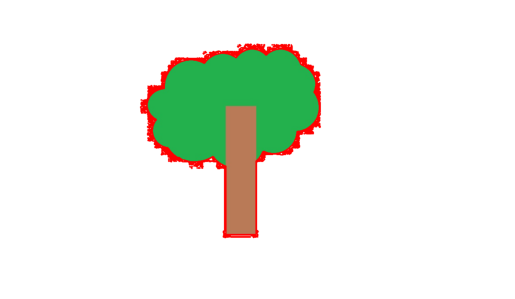

--------------------------------------------------------------
Number of contours found in RETR_TREE = 1


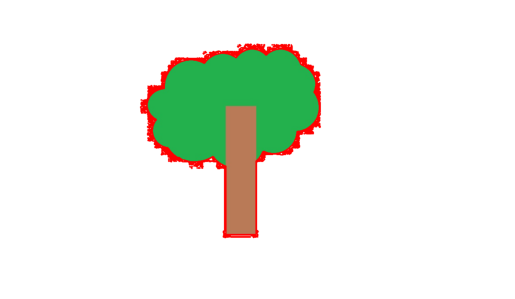

In [11]:
contours_types = [cv2.RETR_EXTERNAL,cv2.RETR_LIST, cv2.RETR_CCOMP, cv2.RETR_TREE]
contours_types_str = ["RETR_EXTERNAL","RETR_LIST", "RETR_CCOMP", "RETR_TREE"]
for contours_type in contours_types:
    contours, hierarchy = cv2.findContours(binary, contours_type, cv2.CHAIN_APPROX_SIMPLE)
    print("--------------------------------------------------------------")
    print(f"Number of contours found in {contours_types_str[contours_type]} = {len(contours)}")
    ### Read the image in color mode for drawing purposes.
    image_copy = cv2.imread('images/shapes.png')

    ### Draw all contours
    cv2.drawContours(tree_original, contours, -1, (0,0,255),2 )

    ### Display the result
    plt.imshow(cv2.cvtColor(tree_original,cv2.COLOR_BGR2RGB));
    plt.axis("off");
    plt.show();
    
    # cv2.imshow(f"{contours_types_str[contours_type]} Contours",tree_original)
    # cv2.waitKey(0)
    

## Edged Detection
    Detect edges in image
    Detect and draw contours

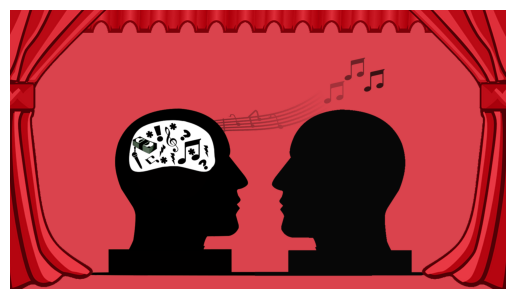

In [12]:
### Read Image
objects = cv2.imread("images/objects.png")

### Display the Image
plt.imshow(cv2.cvtColor(objects,cv2.COLOR_BGR2RGB));
plt.axis("off");

### Use cv2.Canny() function for detecting edges in the image.

### Syntax : cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)
    Image         : Input image to which Canny filter will be applied
    T_lower       : Lower threshold value in Hysteresis Thresholding
    T_upper       : Upper threshold value in Hysteresis Thresholding
    aperture_size : Aperture size of the Sobel filter.
    L2Gradient    : Boolean parameter used for more precision in calculating Edge Gradient.


### Syntax : cv2.gaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
    src                   : This is the input image, which should be a grayscale or color image with 8-bit unsigned integers (CV_8U), 16-bit signed integers (CV_16S), or 32-bit floating-point numbers (CV_32F).
    ksize                 : This specifies the size of the Gaussian kernel used for blurring. It should be a tuple (width, height) where both width and height should be positive and odd numbers. Alternatively, you can pass a single positive odd integer, and in that case, the kernel size will be (ksize, ksize).
    sigmaX                : This parameter represents the standard deviation of the Gaussian kernel in the X direction. It determines the amount of blurring. A higher value of sigmaX will result in more blurring.
    dst (optional)        : This is the output image. It has the same size and type as the input src. If not provided, the function creates an output image of the same size and type as the input src.
    sigmaY (optional)     : This represents the standard deviation of the Gaussian kernel in the Y direction. By default, it is set to 0, which means the sigmaY value is automatically set to be equal to sigmaX.
    borderType (optional) : This parameter specifies how to handle border pixels. By default, it is set to cv2.BORDER_DEFAULT.

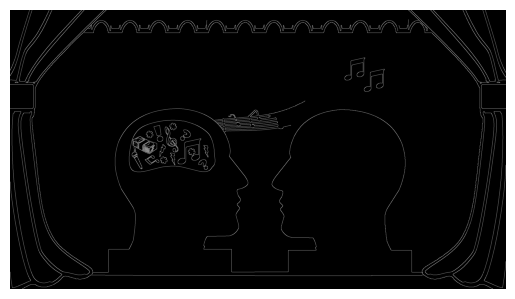

In [13]:
### Blur the image to remove noise
blurred_objects = cv2.GaussianBlur(objects, (21,21),1)

### Apply canny edge detection
edges = cv2.Canny(blurred_objects, 50, 200)

### Display
plt.imshow(edges, cmap = "Greys_r");
plt.axis("off");


--------------------------------------------------------------
Number of contours found in RETR_EXTERNAL = 70


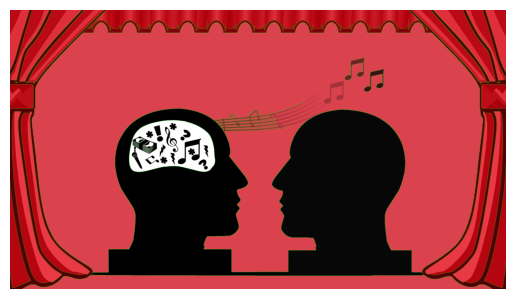

--------------------------------------------------------------
Number of contours found in RETR_LIST = 284


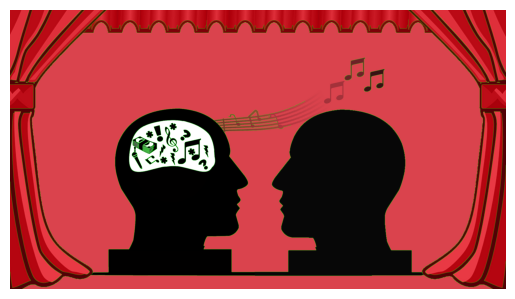

--------------------------------------------------------------
Number of contours found in RETR_CCOMP = 284


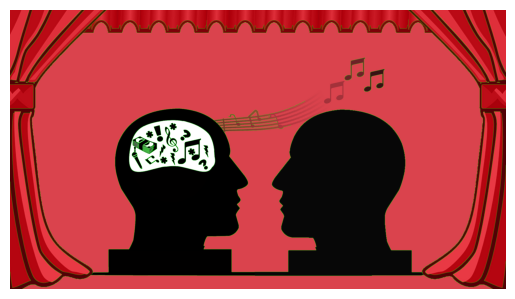

--------------------------------------------------------------
Number of contours found in RETR_TREE = 284


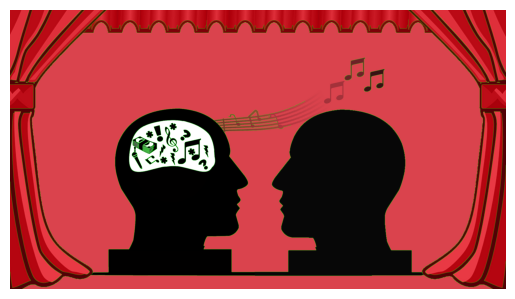

In [14]:
### Detect contours using the edges
contours_types = [cv2.RETR_EXTERNAL,cv2.RETR_LIST, cv2.RETR_CCOMP, cv2.RETR_TREE]
contours_types_str = ["RETR_EXTERNAL","RETR_LIST", "RETR_CCOMP", "RETR_TREE"]
for contours_type in contours_types:
    contours, hierarchy = cv2.findContours(edges, contours_type, cv2.CHAIN_APPROX_SIMPLE)
    print("--------------------------------------------------------------")
    print(f"Number of contours found in {contours_types_str[contours_type]} = {len(contours)}")
    ### Read the image in color mode for drawing purposes.
    image_copy = cv2.imread('images/objects.png')

    ### Draw all contours
    object = cv2.drawContours(objects, contours, -1, (0,255,0), 1)
    
    ### Display the result
    plt.imshow(cv2.cvtColor(objects,cv2.COLOR_BGR2RGB));
    plt.axis("off");
    plt.show();
    
    # cv2.imshow(f"{contours_types_str[contours_type]} Contours",tree_original)
    # cv2.waitKey(0)
    


### In color variation You use Canny Edge Detection.

### Retrieval Modes
    cv2.RETR_EXTERNAL : Retrieves only external contours.
    cv2.RETR_LIST     : Retrieves all of the contours without establishing any hierarchial relationships.
    cv2.RETR_TREE     : Retrieves all of contours and reconstructs a full hierarchy of nested contours.
    cv2.RETR_CCOMP    : Retrieves all of the contours and organizes them to a two-level hierarchy. At top level there are external boundaries of the components.At the Second level, there are boundaries  of the holes. If there is another contour inside a hole of a connected component, it is still put at top level.

### In cv2.RETR_CCOMP you can retrieve contours and organizes them into a two-level hierarrchy. At the top level, there are external boundaries of the object.At the second level, there are boundaries of the holes in object. If there is another contour  inside that hole, it is still put at the top level. TO visualize the two levels we check for the contours that do not have any parent i.e the fourth value in hierarchy [Next, Previous, First_Child, Parent] is set to -1. These contours from the first level and are represented with green color while all other are second-level contours in red.

------Hierarchy------
[[[ 1 -1 -1 -1]
  [ 3  0  2 -1]
  [-1 -1 -1  1]
  [ 4  1 -1 -1]
  [ 5  3 -1 -1]
  [-1  4  6 -1]
  [-1 -1 -1  5]]]
Number of contours : 7


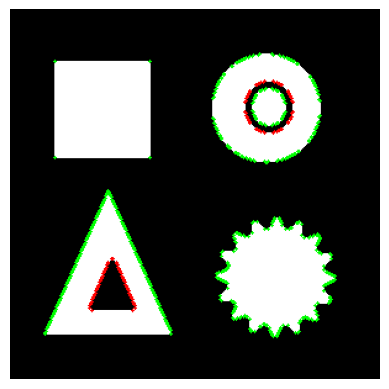

In [15]:
original_image = cv2.imread('images/shapes.png')
gray_image     = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

### Finda all contours in the image using cv2.RETR_CCOMP
contours,hierarchy = cv2.findContours(gray_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

print("------Hierarchy------")
print(hierarchy)

### Loop over all the contours detected
for i, cont in enumerate(contours):
    
    ### If the contour is at first level draw it in green.
    if hierarchy[0][i][3] == -1:
        original_image = cv2.drawContours(original_image, cont, -1, (0,255,0),2)
    else:
        original_image = cv2.drawContours(original_image, cont, -1, (255,0,0,),2)
print(f"Number of contours : {len(contours)}")

plt.imshow(original_image);
plt.axis("off");        

In [16]:
hierarchy[0][1]

array([ 3,  0,  2, -1], dtype=int32)

### Hierarchy link
    https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html

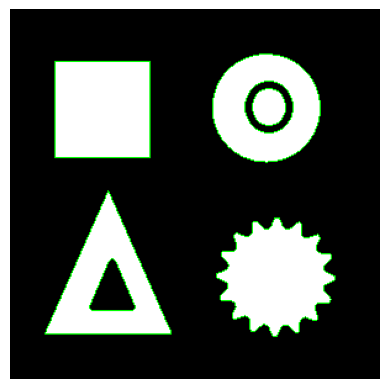

In [17]:
image = cv2.imread("images/shapes.png")
draw_image = image.copy()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Find contours.
contours,hierarchy = cv2.findContours(gray_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
### Draw contours.
draw_image = cv2.drawContours(image, contours, -1, (0,255,0), 1)

### Display
plt.imshow(cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB));
plt.axis("off");

Next, Previous, Child, Parent
------Hierarchy------
[[[ 1 -1 -1 -1]
  [ 3  0  2 -1]
  [-1 -1 -1  1]
  [ 4  1 -1 -1]
  [ 5  3 -1 -1]
  [-1  4  6 -1]
  [-1 -1 -1  5]]]


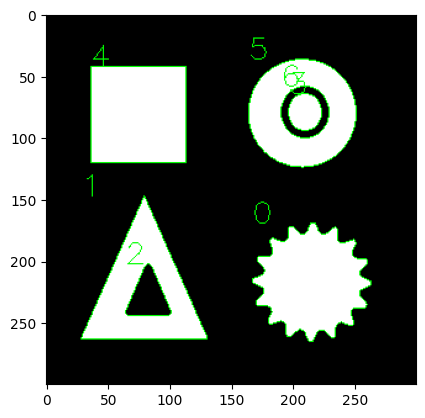

In [18]:
# Initialize a counter for IDs
id_counter = 0

print("Next, Previous, Child, Parent")
# Iterate over contours and assign IDs
for contour in contours:
    # Set an ID to the contour (e.g., using OpenCV's boundingRect function)
    x, y, w, h = cv2.boundingRect(contour)
    cv2.putText(draw_image, str(id_counter), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1)
    id_counter += 1
print("------Hierarchy------")
print(hierarchy)

plt.imshow(cv2.cvtColor(draw_image,cv2.COLOR_BGR2RGB))

# column 3 child column 4 parent
# no next, no previous, no child, parent 